## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [170]:
model = nn.Sequential(
    nn.Linear(2, 4),  # Input layer to hidden layer
    # nn.Tanh(),        # ReLU activation
    # nn.Linear(2, 2),  # Hidden layer to hidden layer
    nn.ReLU(),        # ReLU activation
    nn.Linear(4, 1),  # Hidden layer to output layer
    nn.Sigmoid()      # Sigmoid activation
)

In [148]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)


In [165]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0], [0, 1], [1, 0], [1, 1], [0, 0]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.],
        [0., 0.]])


In [166]:
# your code here
data_target = torch.tensor([[0], [1], [1], [0], [0], [1], [1], [0], [0]], dtype=torch.float32)
print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]])


In [171]:
import torch.optim as optim

criterion = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.03)

In [172]:
# your code here
# Train the model
for epoch in range(1500):
    for inputs, labels in zip(data_in, data_target):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 7500, loss.item()))

Epoch [100/7500], Loss: 0.1354
Epoch [100/7500], Loss: 0.4238
Epoch [100/7500], Loss: 0.4307
Epoch [100/7500], Loss: 0.3068
Epoch [100/7500], Loss: 0.1393
Epoch [100/7500], Loss: 0.4233
Epoch [100/7500], Loss: 0.4172
Epoch [100/7500], Loss: 0.3048
Epoch [100/7500], Loss: 0.1376
Epoch [200/7500], Loss: 0.0359
Epoch [200/7500], Loss: 0.1452
Epoch [200/7500], Loss: 0.1459
Epoch [200/7500], Loss: 0.0689
Epoch [200/7500], Loss: 0.0357
Epoch [200/7500], Loss: 0.1445
Epoch [200/7500], Loss: 0.1454
Epoch [200/7500], Loss: 0.0675
Epoch [200/7500], Loss: 0.0354
Epoch [300/7500], Loss: 0.0167
Epoch [300/7500], Loss: 0.0747
Epoch [300/7500], Loss: 0.0744
Epoch [300/7500], Loss: 0.0293
Epoch [300/7500], Loss: 0.0167
Epoch [300/7500], Loss: 0.0743
Epoch [300/7500], Loss: 0.0743
Epoch [300/7500], Loss: 0.0290
Epoch [300/7500], Loss: 0.0166
Epoch [400/7500], Loss: 0.0102
Epoch [400/7500], Loss: 0.0482
Epoch [400/7500], Loss: 0.0481
Epoch [400/7500], Loss: 0.0165
Epoch [400/7500], Loss: 0.0101
Epoch [4

Input: tensor([0., 0.]) Output: tensor([0.0014], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.9913], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([0.9913], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.0022], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 0.]) Output: tensor([0.0014], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.9913], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([0.9913], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.0022], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 0.]) Output: tensor([0.0014], grad_fn=<SigmoidBackward0>) Target: tensor([0.])


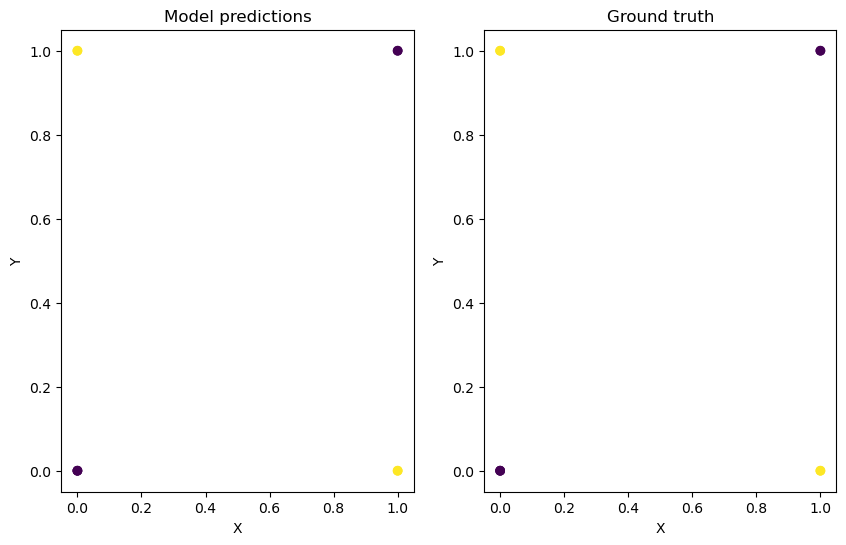

In [173]:
# your code here
# visualize the resuts
import numpy as np

for inputs, labels in zip(data_in, data_target):
    outputs = model(inputs)
    print(f'Input: {inputs} Output: {outputs} Target: {labels}')

# plot those results as well
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Model predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=np.round(model(data_in).detach().numpy().flatten()))
plt.subplot(1, 2, 2)
plt.title('Ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=data_target.flatten())
plt.show()

In [ ]:
# your code here
# print model wights

Epoch [100/7500], Loss: 0.6876
Epoch [200/7500], Loss: 0.6774
Epoch [300/7500], Loss: 0.6615
Epoch [400/7500], Loss: 0.6430
Epoch [500/7500], Loss: 0.6227
Epoch [600/7500], Loss: 0.6007
Epoch [700/7500], Loss: 0.5780
Epoch [800/7500], Loss: 0.5564
Epoch [900/7500], Loss: 0.5378
Epoch [1000/7500], Loss: 0.5229
Epoch [1100/7500], Loss: 0.5105
Epoch [1200/7500], Loss: 0.5014
Epoch [1300/7500], Loss: 0.4942
Epoch [1400/7500], Loss: 0.4888
Epoch [1500/7500], Loss: 0.4846
Epoch [1600/7500], Loss: 0.4810
Epoch [1700/7500], Loss: 0.4782
Epoch [1800/7500], Loss: 0.4751
Epoch [1900/7500], Loss: 0.4721
Epoch [2000/7500], Loss: 0.4682
Epoch [2100/7500], Loss: 0.4628
Epoch [2200/7500], Loss: 0.4547
Epoch [2300/7500], Loss: 0.4436
Epoch [2400/7500], Loss: 0.4304
Epoch [2500/7500], Loss: 0.4135
Model has reached 100% accuracy on epoch  2510
Input: tensor([0., 0.]) Output: tensor([0.2672], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.3330], grad_fn=<Sigmoi

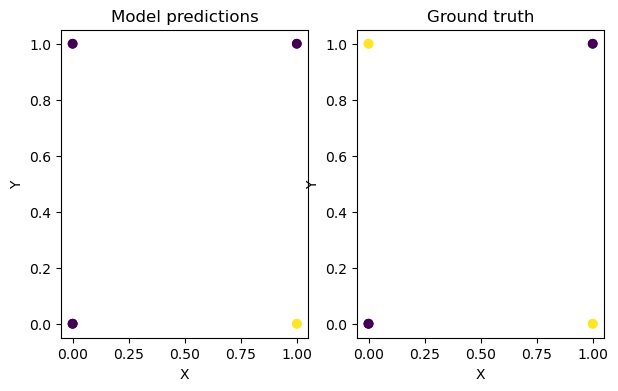

In [123]:
### MODEL 1

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

model1 = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0], [0, 1], [1, 0], [1, 1], [0, 0]], dtype=torch.float32)


data_target = torch.tensor([[0], [1], [1], [0], [0], [1], [1], [0], [0]], dtype=torch.float32)

criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.025)

epochs = 7500
for epoch in range(epochs):
    #for inputs, labels in zip(data_in, data_target):
    inputs = data_in
    labels = data_target
    optimizer.zero_grad()
    outputs = model1(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #if (epoch+1) % 100 == 0:
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    correct = 0
    total = len(data_target)
    with torch.no_grad():
        correct = (outputs >= 0.333).float()
        accuracy = (correct == labels).float().mean()
    if(accuracy == 1.0):
        print("Model has reached 100% accuracy on epoch ", epoch+1)
        break


for inputs, labels in zip(data_in, data_target):
    outputs = model1(inputs)
    print(f'Input: {inputs} Output: {outputs} Target: {labels}')


# compute accuracy of the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in zip(data_in, data_target):
        outputs = model1(inputs)
        total += 1
        # check if output is close to the lable
        if outputs >= 0.3:
            outputs = 1
        else:
            outputs = 0
        if outputs == labels:
            correct += 1
print("############")
print(f'Accuracy of the network: {100 * correct / total}%')


# plot those results as well, showing the difference between output and target
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('Model predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=np.round(model1(data_in).detach().numpy().flatten()))
plt.subplot(1, 2, 2)
plt.title('Ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=data_target.flatten())
plt.show()




Epoch [100/2000], Loss: 0.2466
Epoch [200/2000], Loss: 0.2404
Epoch [300/2000], Loss: 0.2168
Epoch [400/2000], Loss: 0.1809
Epoch [500/2000], Loss: 0.1630
Epoch [600/2000], Loss: 0.1558
Epoch [700/2000], Loss: 0.1527
Epoch [800/2000], Loss: 0.1511
Epoch [900/2000], Loss: 0.1503
Epoch [1000/2000], Loss: 0.1497
Epoch [1100/2000], Loss: 0.1494
Epoch [1200/2000], Loss: 0.1491
Epoch [1300/2000], Loss: 0.1490
Epoch [1400/2000], Loss: 0.1488
Epoch [1500/2000], Loss: 0.1487
Epoch [1600/2000], Loss: 0.1487
Epoch [1700/2000], Loss: 0.1486
Epoch [1800/2000], Loss: 0.1485
Epoch [1900/2000], Loss: 0.1485
Epoch [2000/2000], Loss: 0.1484
Input: tensor([0., 0.]) Output: tensor([0.0299], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.6652], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([0.6652], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.6652], grad_fn=<SigmoidBackward0>

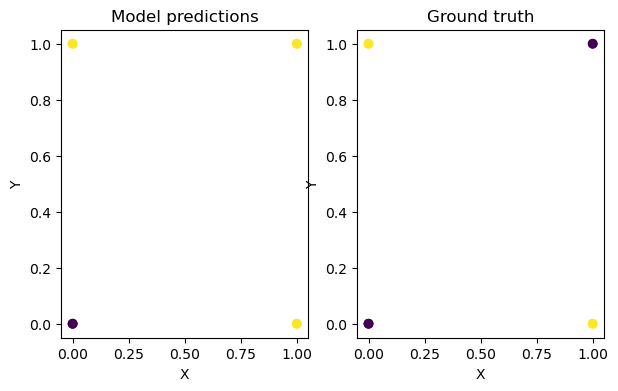

Parameter containing:
tensor([[-0.9352, -0.9286],
        [-0.5747, -0.5723]], requires_grad=True)
Parameter containing:
tensor([[1.0685, 1.7219],
        [0.8989, 1.3545]], requires_grad=True)
Parameter containing:
tensor([[-1.1692, -1.8254]], requires_grad=True)


In [125]:
### MODEL 2

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

model2 = nn.Sequential(
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.Tanh(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0], [0, 1], [1, 0], [1, 1], [0, 0]], dtype=torch.float32)


data_target = torch.tensor([[0], [1], [1], [0], [0], [1], [1], [0], [0]], dtype=torch.float32)

criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

epochs = 2000
for epoch in range(epochs):
    inputs = data_in
    labels = data_target
    optimizer.zero_grad()
    outputs = model2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #if (epoch+1) % 100 == 0:
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    total = len(data_target)
    accuracy = -1
    with torch.no_grad():
        correct = (outputs >= 0.4)
        accuracy = (correct == data_target).float().mean()
    if(accuracy == 1.0):
        print("Model has reached 100% accuracy on epoch ", epoch+1)
        break


for inputs, labels in zip(data_in, data_target):
    outputs = model2(inputs)
    print(f'Input: {inputs} Output: {outputs} Target: {labels}')


# compute accuracy of the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in zip(data_in, data_target):
        outputs = model2(inputs)
        total += 1
        # check if output is close to the lable
        if outputs >= 0.4:
            outputs = 1
        else:
            outputs = 0
        if outputs == labels:
            correct += 1
print("############")
print(f'Accuracy of the network: {100 * correct / total}%')


# plot those results as well, showing the difference between output and target
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('Model predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=np.round(model2(data_in).detach().numpy().flatten()))
plt.subplot(1, 2, 2)
plt.title('Ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=data_target.flatten())
plt.show()

# print model weights
for i in range(len(model2)):
    if hasattr(model2[i], 'weight'):
        print(model2[i].weight)



Epoch [100/5000], Loss: 0.6871
Epoch [200/5000], Loss: 0.6712
Epoch [300/5000], Loss: 0.6433
Epoch [400/5000], Loss: 0.5937
Epoch [500/5000], Loss: 0.5260
Epoch [600/5000], Loss: 0.4383
Model has reached 100% accuracy on epoch  656
Input: tensor([0., 0.]) Output: tensor([0.3322], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.7572], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([0.6022], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.2902], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 0.]) Output: tensor([0.3322], grad_fn=<SigmoidBackward0>) Target: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.7572], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([0.6022], grad_fn=<SigmoidBackward0>) Target: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.2902], grad_fn=<SigmoidBackward0>) Targe

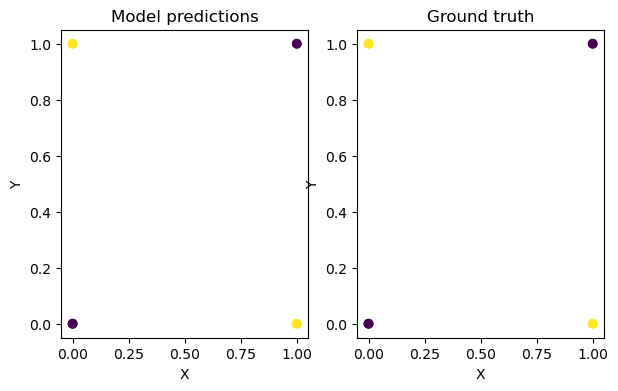

Parameter containing:
tensor([[ 0.1502, -0.1715],
        [ 0.1724,  0.2487],
        [-1.2076,  1.2104],
        [ 0.9574, -0.9505]], requires_grad=True)
Parameter containing:
tensor([[ 0.2830, -0.4855,  1.6228,  1.2499]], requires_grad=True)


In [120]:
### MODEL 3

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

model3 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1], [0, 0], [0, 1], [1, 0], [1, 1], [0, 0]], dtype=torch.float32)


data_target = torch.tensor([[0], [1], [1], [0], [0], [1], [1], [0], [0]], dtype=torch.float32)

criterion = nn.BCELoss()
optimizer = optim.SGD(model3.parameters(), lr=0.04)

epochs = 5000
for epoch in range(epochs):
    #for inputs, labels in zip(data_in, data_target):
    inputs = data_in
    labels = data_target
    optimizer.zero_grad()
    outputs = model3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #if (epoch+1) % 100 == 0:
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    correct = 0
    total = len(data_target)
    with torch.no_grad():
        correct = (outputs >= 0.333).float()
        accuracy = (correct == labels).float().mean()
    if(accuracy == 1.0):
        print("Model has reached 100% accuracy on epoch ", epoch+1)
        break

for epoch in range(epochs):
    for inputs, labels in zip(data_in, data_target):
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #if (epoch+1) % 100 == 0:
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
        correct = 0
        total = len(data_target)
        print("outputs: ", outputs)
        break
        # with torch.no_grad():
        #     correct = (outputs >= 0.333).float()
        #     accuracy = (correct == labels).float().mean()
        # if(accuracy == 438569.0):
        #     print("Model has reached 100% accuracy on epoch ", epoch+1)
        #     break
    else:
        continue
    break


for inputs, labels in zip(data_in, data_target):
    outputs = model3(inputs)
    print(f'Input: {inputs} Output: {outputs} Target: {labels}')


# compute accuracy of the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in zip(data_in, data_target):
        outputs = model3(inputs)
        total += 1
        # check if output is close to the lable
        if outputs >= 0.333:
            outputs = 1
        else:
            outputs = 0
        if outputs == labels:
            correct += 1
print("############")
print(f'Accuracy of the network: {100 * correct / total}%')


# plot those results as well, showing the difference between output and target
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('Model predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=np.round(model3(data_in).detach().numpy().flatten()))
plt.subplot(1, 2, 2)
plt.title('Ground truth')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(data_in[:, 0], data_in[:, 1], c=data_target.flatten())
plt.show()

# print model weights
for i in range(len(model3)):
    if hasattr(model3[i], 'weight'):
        print(model3[i].weight)
